k-Fold Cross-Validation: Mean = -1631.5392491437349, Std Dev = 94.46035582793672
Bootstrapping: Mean = 1626.204852786726, Std Dev = 4.547473508864641e-13
AIC: 10078.661582501196


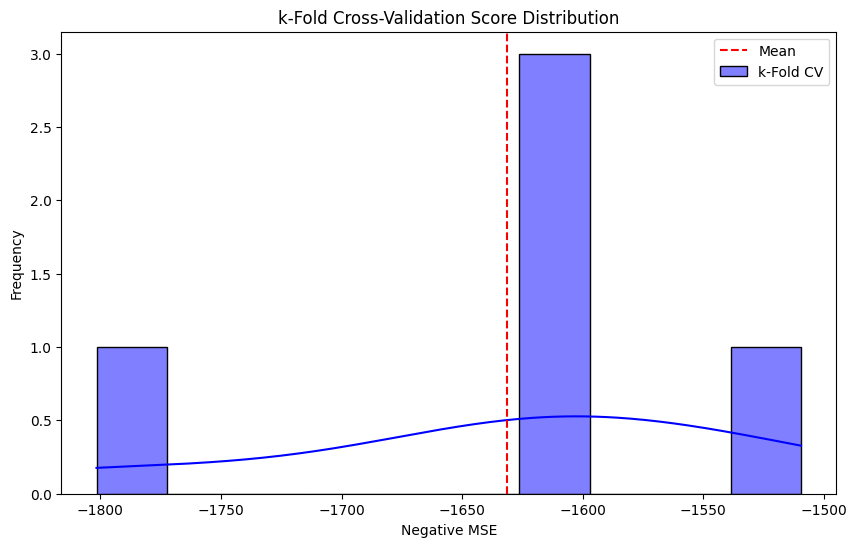

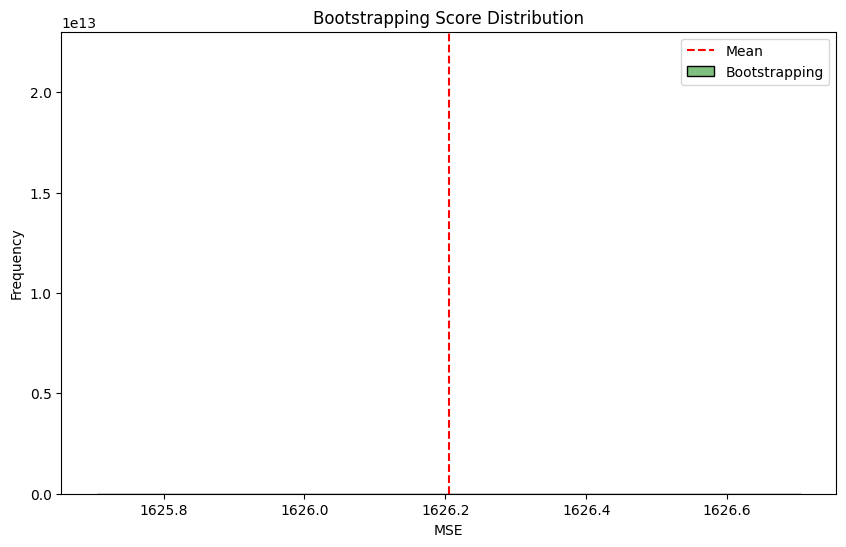

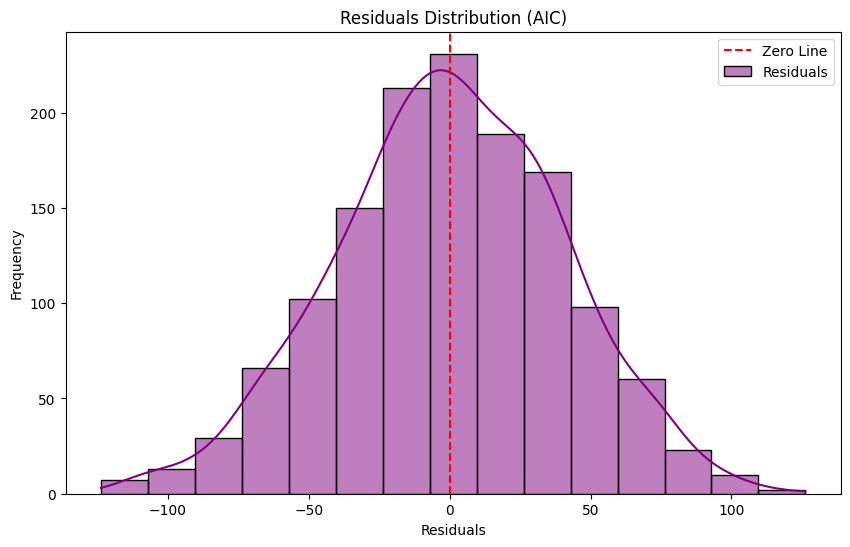

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from math import log

# Load the dataset
file_path = "Customer Purchase Data.csv"
data = pd.read_csv(file_path)

# Features and target variable
X = data[['Age', 'Income', 'Membership_Years', 'Purchase_Frequency']]  # Predictor variables
y = data['Last_Purchase_Amount']  # Target variable

# k-Fold Cross-Validation
def k_fold_cv(model, X, y, k=5, scoring='neg_mean_squared_error'):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring=scoring)
    return scores  # Return all scores for visualization

# Bootstrapping
def bootstrap_model_selection(model, X, y, n_bootstrap=100):
    scores = []
    for _ in range(n_bootstrap):
        X_resampled, y_resampled = resample(X, y, random_state=42)
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X)
        scores.append(mean_squared_error(y, y_pred))
    return scores  # Return all scores for visualization

# AIC Calculation for Linear Regression
def calculate_aic(model, X, y):
    model.fit(X, y)
    n = len(y)  # Number of observations
    residuals = y - model.predict(X)
    rss = np.sum(residuals**2)  # Residual sum of squares
    k = X.shape[1] + 1  # Number of parameters (predictors + intercept)
    aic = n * log(rss / n) + 2 * k
    return aic, residuals  # Return residuals for visualization

# Initialize the linear regression model
model = LinearRegression()

# k-Fold Cross-Validation
k_fold_scores = k_fold_cv(model, X, y, k=5)
k_fold_mean, k_fold_std = np.mean(k_fold_scores), np.std(k_fold_scores)
print(f"k-Fold Cross-Validation: Mean = {k_fold_mean}, Std Dev = {k_fold_std}")

# Bootstrapping
bootstrap_scores = bootstrap_model_selection(model, X, y, n_bootstrap=100)
bootstrap_mean, bootstrap_std = np.mean(bootstrap_scores), np.std(bootstrap_scores)
print(f"Bootstrapping: Mean = {bootstrap_mean}, Std Dev = {bootstrap_std}")

# AIC
aic, residuals = calculate_aic(model, X, y)
print(f"AIC: {aic}")

# Visualizations
# 1. k-Fold Cross-Validation Distribution
plt.figure(figsize=(10, 6))
sns.histplot(k_fold_scores, kde=True, color='blue', bins=10, label='k-Fold CV')
plt.axvline(k_fold_mean, color='red', linestyle='--', label='Mean')
plt.title("k-Fold Cross-Validation Score Distribution")
plt.xlabel("Negative MSE")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 2. Bootstrapping Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_scores, kde=True, color='green', bins=10, label='Bootstrapping')
plt.axvline(bootstrap_mean, color='red', linestyle='--', label='Mean')
plt.title("Bootstrapping Score Distribution")
plt.xlabel("MSE")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 3. Residual Analysis for AIC
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=15, label='Residuals')
plt.axvline(0, color='red', linestyle='--', label='Zero Line')
plt.title("Residuals Distribution (AIC)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()
